# # DSA 2040 - Section 2, Task 1: Data Preprocessing and Exploration
## Dataset: Iris Dataset Analysis

# 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Loading

We'll use the built-in Iris dataset from scikit-learn. This dataset contains 150 samples of iris flowers with 4 features each.

In [5]:
def load_iris_dataset():
    """
    Load the Iris dataset from scikit-learn
    
    Returns:
        pandas.DataFrame: Iris dataset with features and target
    """
    # Load iris dataset
    iris = load_iris()
    
    # Create DataFrame with feature names
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    
    # Add target column with species names
    df['species'] = iris.target
    df['species_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print(f"Features: {list(iris.feature_names)}")
    print(f"Target classes: {list(iris.target_names)}")
    
    return df, iris

# Load the dataset
df, iris_info = load_iris_dataset()

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset loaded successfully!
Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa', 'versicolor', 'virginica']

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


## 3. Data Preprocessing

### 3.1 Missing Values Check

In [8]:
def check_missing_values(df):
    """
    Check for missing values in the dataset
    
    Args:
        df (pandas.DataFrame): Input dataset
    """
    print("=== Missing Values Analysis ===")
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': missing_values.index,
        'Missing Count': missing_values.values,
        'Missing Percentage': missing_percentage.values
    })
    
    print(missing_df)
    
    if missing_values.sum() == 0:
        print("\n✅ No missing values found in the dataset!")
    else:
        print(f"\n⚠ Total missing values: {missing_values.sum()}")
    
    return missing_df

# Check for missing values
missing_analysis = check_missing_values(df)

=== Missing Values Analysis ===
              Column  Missing Count  Missing Percentage
0  sepal length (cm)              0                 0.0
1   sepal width (cm)              0                 0.0
2  petal length (cm)              0                 0.0
3   petal width (cm)              0                 0.0
4            species              0                 0.0
5       species_name              0                 0.0

✅ No missing values found in the dataset!


### 3.2 Feature Normalization using Min-Max Scaling

In [9]:
def normalize_features(df, feature_columns):
    """
    Normalize features using Min-Max scaling
    
    Args:
        df (pandas.DataFrame): Input dataset
        feature_columns (list): List of feature column names
        
    Returns:
        pandas.DataFrame: Dataset with normalized features
        MinMaxScaler: Fitted scaler object
    """
    print("=== Feature Normalization ===")
    
    # Create a copy of the dataframe
    df_normalized = df.copy()
    
    # Initialize MinMax scaler
    scaler = MinMaxScaler()
    
    # Fit and transform the features
    df_normalized[feature_columns] = scaler.fit_transform(df[feature_columns])
    
    print("✅ Features normalized using Min-Max scaling (range: 0-1)")
    
    # Display before and after comparison
    print("\nBefore normalization (original features):")
    print(df[feature_columns].describe().round(3))
    
    print("\nAfter normalization:")
    print(df_normalized[feature_columns].describe().round(3))
    
    return df_normalized, scaler

# Get feature column names (exclude target columns)
feature_columns = [col for col in df.columns if col not in ['species', 'species_name']]
print(f"Feature columns to normalize: {feature_columns}")

# Normalize features
df_normalized, scaler = normalize_features(df, feature_columns)

Feature columns to normalize: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
=== Feature Normalization ===
✅ Features normalized using Min-Max scaling (range: 0-1)

Before normalization (original features):
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count            150.000           150.000            150.000   
mean               5.843             3.057              3.758   
std                0.828             0.436              1.765   
min                4.300             2.000              1.000   
25%                5.100             2.800              1.600   
50%                5.800             3.000              4.350   
75%                6.400             3.300              5.100   
max                7.900             4.400              6.900   

       petal width (cm)  
count           150.000  
mean              1.199  
std               0.762  
min               0.100  
25%               0.300  
50%            

### 3.3 Label Encoding

In [10]:
def encode_labels(df, target_column='species'):
    """
    Encode target labels if needed
    
    Args:
        df (pandas.DataFrame): Input dataset
        target_column (str): Name of target column
        
    Returns:
        pandas.DataFrame: Dataset with encoded labels
        LabelEncoder: Fitted encoder object
    """
    print("=== Label Encoding ===")
    
    df_encoded = df.copy()
    
    # Check if target is already numeric
    if df[target_column].dtype in ['int64', 'int32']:
        print("✅ Target labels are already numeric, no encoding needed")
        encoder = None
    else:
        # Apply label encoding
        encoder = LabelEncoder()
        df_encoded[f'{target_column}_encoded'] = encoder.fit_transform(df[target_column])
        print(f"✅ Target labels encoded successfully")
        print(f"Original classes: {list(encoder.classes_)}")
        print(f"Encoded values: {list(range(len(encoder.classes_)))}")
    
    return df_encoded, encoder

# Encode labels
df_processed, label_encoder = encode_labels(df_normalized)

print("\nProcessed dataset shape:", df_processed.shape)
print("\nProcessed dataset columns:", list(df_processed.columns))

=== Label Encoding ===
✅ Target labels are already numeric, no encoding needed

Processed dataset shape: (150, 6)

Processed dataset columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species', 'species_name']


## 4. Exploratory Data Analysis

### 4.1 Summary Statistics

In [12]:
def compute_summary_statistics(df, feature_columns):
    """
    Compute and display comprehensive summary statistics
    
    Args:
        df (pandas.DataFrame): Input dataset
        feature_columns (list): List of feature columns
    """
    print("=== Summary Statistics ===")
    
    # Basic statistics for features
    print("\n📊 Descriptive Statistics for Features:")
    summary_stats = df[feature_columns].describe()
    print(summary_stats.round(4))
    
    # Statistics by species
    print("\n📊 Statistics by Species:")
    for species in df['species_name'].unique():
        print(f"\n--- {species.title()} ---")
        species_data = df[df['species_name'] == species][feature_columns]
        print(species_data.describe().round(4))
    
    # Class distribution
    print("\n📊 Class Distribution:")
    class_counts = df['species_name'].value_counts()
    class_percentages = df['species_name'].value_counts(normalize=True) * 100
    
    distribution_df = pd.DataFrame({
        'Species': class_counts.index,
        'Count': class_counts.values,
        'Percentage': class_percentages.values.round(2)
    })
    print(distribution_df)
    
    return summary_stats

# Compute summary statistics
summary_stats = compute_summary_statistics(df_processed, feature_columns)

=== Summary Statistics ===

📊 Descriptive Statistics for Features:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           150.0000          150.0000           150.0000   
mean              0.4287            0.4406             0.4675   
std               0.2300            0.1816             0.2992   
min               0.0000            0.0000             0.0000   
25%               0.2222            0.3333             0.1017   
50%               0.4167            0.4167             0.5678   
75%               0.5833            0.5417             0.6949   
max               1.0000            1.0000             1.0000   

       petal width (cm)  
count          150.0000  
mean             0.4581  
std              0.3176  
min              0.0000  
25%              0.0833  
50%              0.5000  
75%              0.7083  
max              1.0000  

📊 Statistics by Species:

--- Setosa ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count 

### 4.2 Data Visualizations

#### 4.2.1 Pairplot Visualization

=== Creating Pairplot ===


<Figure size 1200x1000 with 0 Axes>

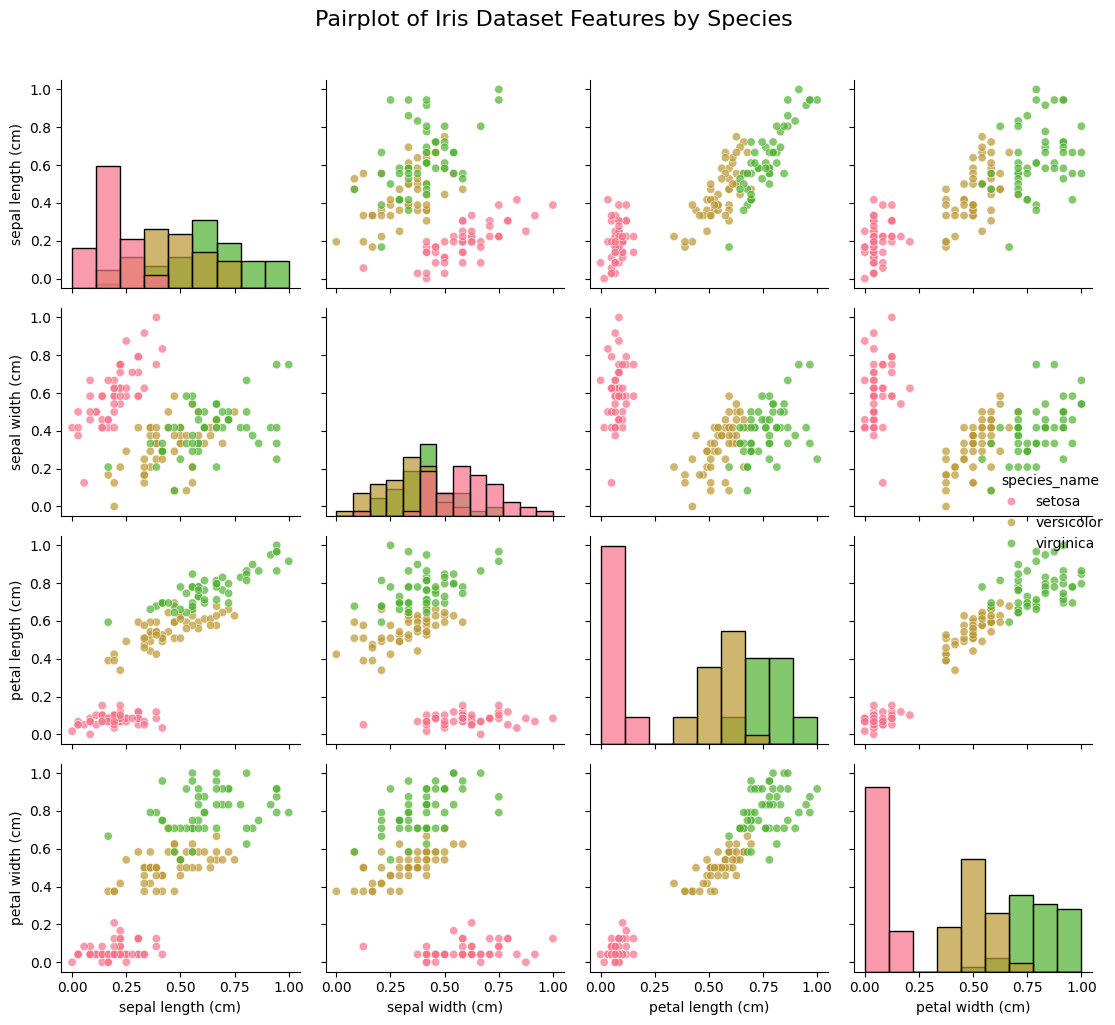

✅ Pairplot created and saved as 'iris_pairplot.png'


In [13]:
def create_pairplot(df, feature_columns, target_column='species_name'):
    """
    Create pairplot to visualize relationships between features
    
    Args:
        df (pandas.DataFrame): Input dataset
        feature_columns (list): List of feature columns
        target_column (str): Target column for color coding
    """
    print("=== Creating Pairplot ===")
    
    # Create pairplot
    plt.figure(figsize=(12, 10))
    
    # Select relevant columns for pairplot
    plot_data = df[feature_columns + [target_column]]
    
    # Create pairplot with species differentiation
    pair_plot = sns.pairplot(
        plot_data, 
        hue=target_column,
        diag_kind='hist',
        plot_kws={'alpha': 0.7},
        diag_kws={'alpha': 0.7}
    )
    
    plt.suptitle('Pairplot of Iris Dataset Features by Species', y=1.02, fontsize=16)
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('iris_pairplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Pairplot created and saved as 'iris_pairplot.png'")

# Create pairplot
create_pairplot(df_processed, feature_columns)

#### 4.2.2 Correlation Heatmap

=== Creating Correlation Heatmap ===


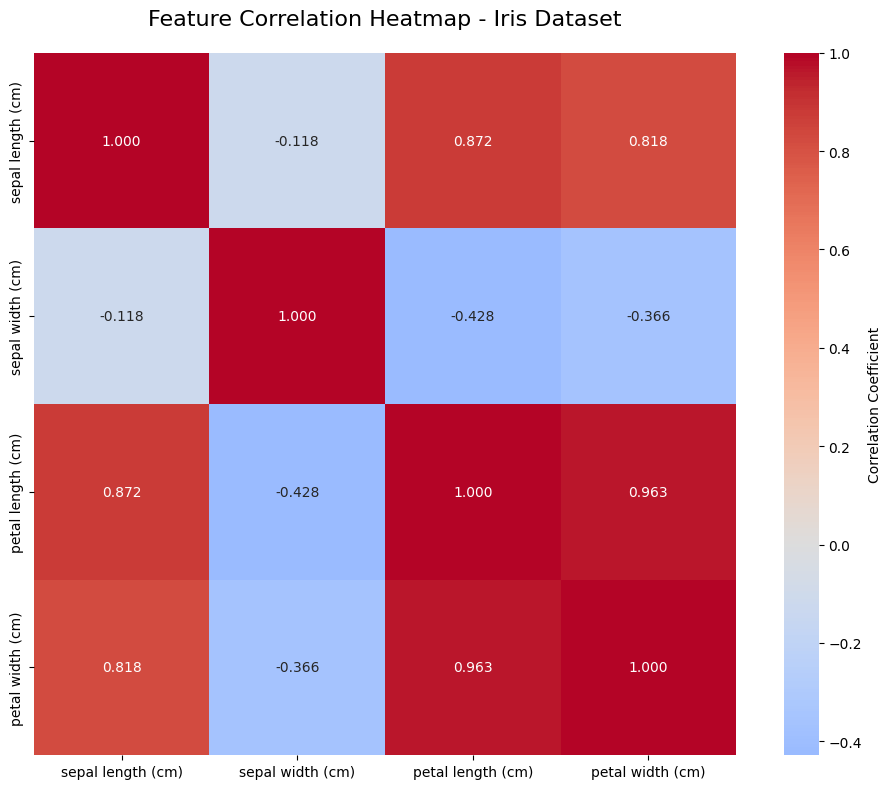

✅ Correlation heatmap created and saved as 'iris_correlation_heatmap.png'

📊 Key Correlation Insights:
           Feature 1          Feature 2  Correlation
5  petal length (cm)   petal width (cm)     0.962865
1  sepal length (cm)  petal length (cm)     0.871754
2  sepal length (cm)   petal width (cm)     0.817941
3   sepal width (cm)  petal length (cm)    -0.428440
4   sepal width (cm)   petal width (cm)    -0.366126


In [14]:
def create_correlation_heatmap(df, feature_columns):
    """
    Create correlation heatmap for features
    
    Args:
        df (pandas.DataFrame): Input dataset
        feature_columns (list): List of feature columns
    """
    print("=== Creating Correlation Heatmap ===")
    
    # Calculate correlation matrix
    correlation_matrix = df[feature_columns].corr()
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    
    # Generate heatmap
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        square=True,
        fmt='.3f',
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    
    plt.title('Feature Correlation Heatmap - Iris Dataset', fontsize=16, pad=20)
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('iris_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Correlation heatmap created and saved as 'iris_correlation_heatmap.png'")
    
    # Print correlation insights
    print("\n📊 Key Correlation Insights:")
    
    # Find highest correlations (excluding self-correlation)
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })
    
    # Sort by absolute correlation
    corr_pairs_df = pd.DataFrame(corr_pairs)
    corr_pairs_df['Abs_Correlation'] = abs(corr_pairs_df['Correlation'])
    corr_pairs_df = corr_pairs_df.sort_values('Abs_Correlation', ascending=False)
    
    print(corr_pairs_df[['Feature 1', 'Feature 2', 'Correlation']].head())
    
    return correlation_matrix

# Create correlation heatmap
correlation_matrix = create_correlation_heatmap(df_processed, feature_columns)

#### 4.2.3 Outlier Detection using Boxplots

=== Outlier Detection using Boxplots ===


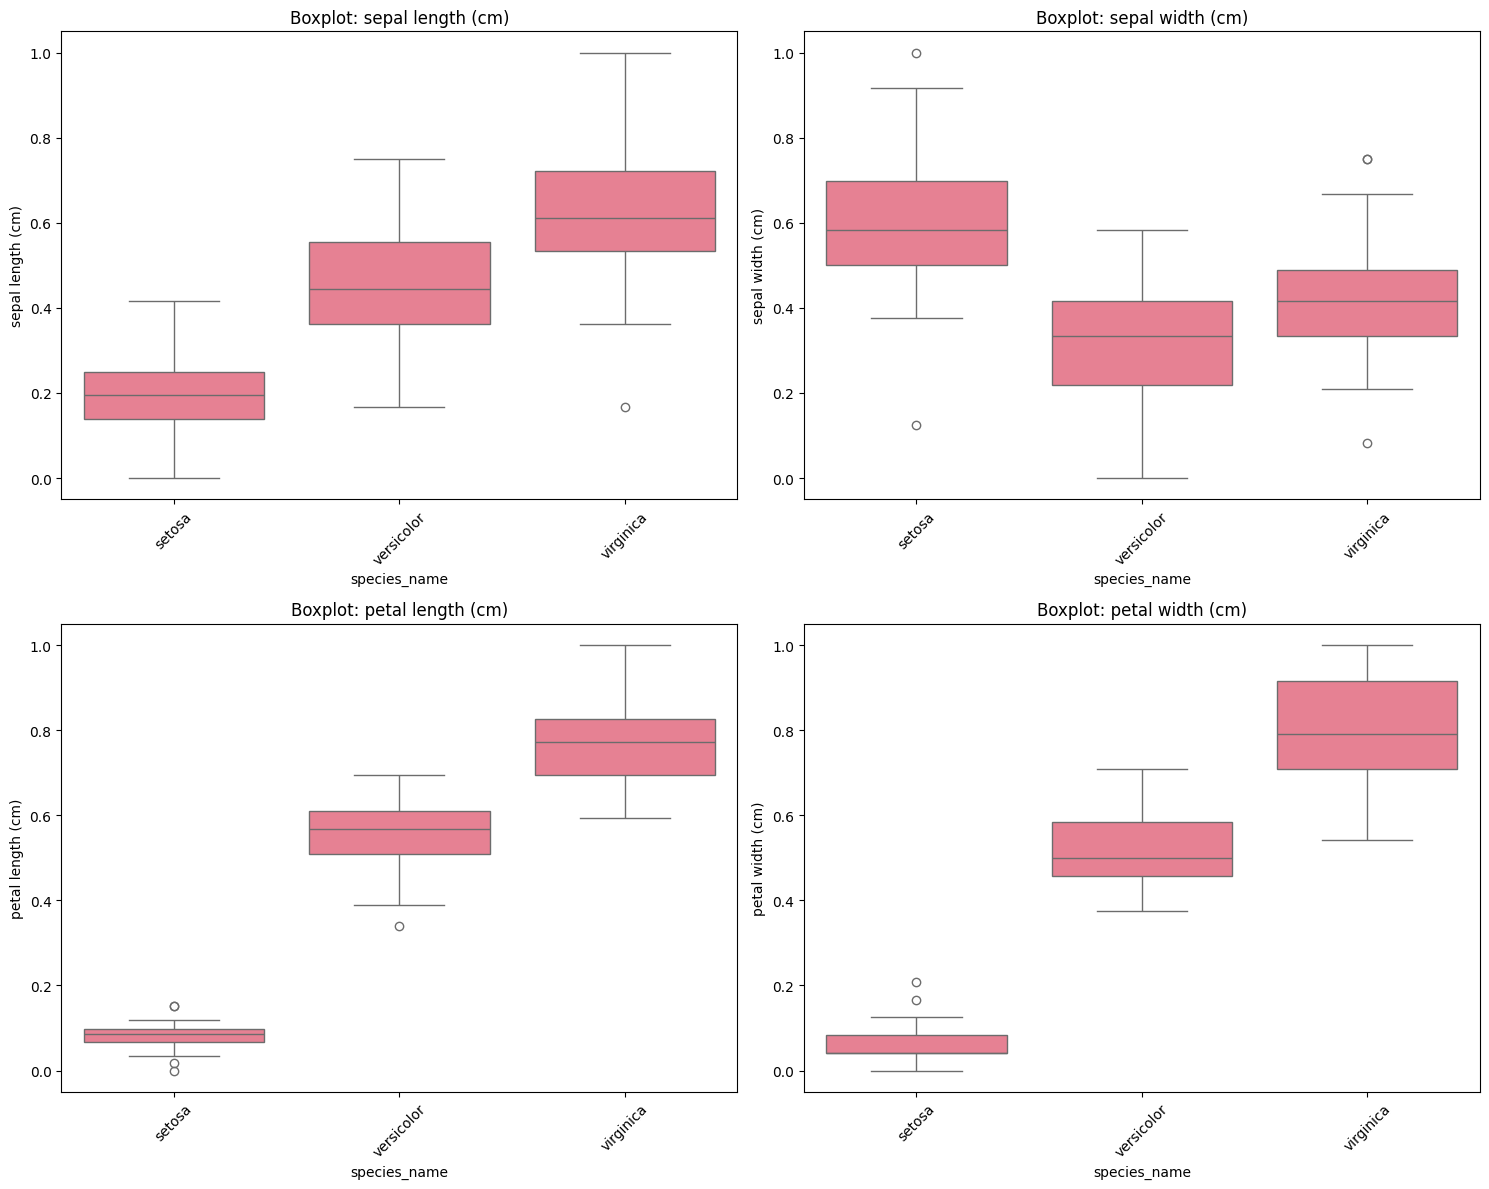


📊 Outlier Analysis Summary:
                   count  percentage  lower_bound  upper_bound
sepal length (cm)      0      0.0000      -0.3194       1.1250
sepal width (cm)       4      2.6667       0.0208       0.8542
petal length (cm)      0      0.0000      -0.7881       1.5847
petal width (cm)       0      0.0000      -0.8542       1.6458
✅ Boxplots created and saved as 'iris_boxplots_outliers.png'


In [15]:
def identify_outliers_boxplot(df, feature_columns, target_column='species_name'):
    """
    Identify outliers using boxplots
    
    Args:
        df (pandas.DataFrame): Input dataset
        feature_columns (list): List of feature columns
        target_column (str): Target column for grouping
    """
    print("=== Outlier Detection using Boxplots ===")
    
    # Create subplots for boxplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    outliers_summary = {}
    
    for idx, feature in enumerate(feature_columns):
        # Create boxplot for each feature
        sns.boxplot(
            data=df,
            x=target_column,
            y=feature,
            ax=axes[idx]
        )
        
        axes[idx].set_title(f'Boxplot: {feature}', fontsize=12)
        axes[idx].tick_params(axis='x', rotation=45)
        
        # Calculate outliers using IQR method
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outliers_summary[feature] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    
    plt.tight_layout()
    plt.savefig('iris_boxplots_outliers.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print outlier summary
    print("\n📊 Outlier Analysis Summary:")
    outliers_df = pd.DataFrame(outliers_summary).T
    outliers_df['count'] = outliers_df['count'].astype(int)
    outliers_df = outliers_df.round(4)
    print(outliers_df)
    
    print("✅ Boxplots created and saved as 'iris_boxplots_outliers.png'")
    
    return outliers_summary

# Identify outliers
outliers_info = identify_outliers_boxplot(df_processed, feature_columns)

## 5. Train-Test Split Function

### 5.1 Data Splitting Implementation

In [16]:
def split_data(df, feature_columns, target_column='species', test_size=0.2, random_state=42):
    """
    Split the dataset into training and testing sets
    
    Args:
        df (pandas.DataFrame): Input dataset
        feature_columns (list): List of feature columns
        target_column (str): Target column name
        test_size (float): Proportion of dataset for testing
        random_state (int): Random seed for reproducibility
        
    Returns:
        tuple: X_train, X_test, y_train, y_test
    """
    print("=== Data Splitting ===")
    
    # Prepare features (X) and target (y)
    X = df[feature_columns].values
    y = df[target_column].values
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state,
        stratify=y  # Ensure balanced split across classes
    )
    
    print(f"✅ Data split completed!")
    print(f"Training set size: {X_train.shape[0]} samples ({(1-test_size)*100:.0f}%)")
    print(f"Testing set size: {X_test.shape[0]} samples ({test_size*100:.0f}%)")
    print(f"Number of features: {X_train.shape[1]}")
    
    # Check class distribution in splits
    print("\n📊 Class Distribution in Splits:")
    
    unique_classes, train_counts = np.unique(y_train, return_counts=True)
    _, test_counts = np.unique(y_test, return_counts=True)
    
    split_summary = pd.DataFrame({
        'Class': unique_classes,
        'Train Count': train_counts,
        'Test Count': test_counts,
        'Train %': (train_counts / len(y_train) * 100).round(1),
        'Test %': (test_counts / len(y_test) * 100).round(1)
    })
    
    print(split_summary)
    
    return X_train, X_test, y_train, y_test

# Split the data
X_train, X_test, y_train, y_test = split_data(df_processed, feature_columns)

=== Data Splitting ===
✅ Data split completed!
Training set size: 120 samples (80%)
Testing set size: 30 samples (20%)
Number of features: 4

📊 Class Distribution in Splits:
   Class  Train Count  Test Count  Train %  Test %
0      0           40          10     33.3    33.3
1      1           40          10     33.3    33.3
2      2           40          10     33.3    33.3


## 6. Summary and Insights

### 6.1 Data Quality Assessment

In [17]:
def generate_data_quality_report(df, feature_columns, outliers_info):
    """
    Generate comprehensive data quality report
    
    Args:
        df (pandas.DataFrame): Input dataset
        feature_columns (list): List of feature columns
        outliers_info (dict): Outlier analysis results
    """
    print("=" * 60)
    print("           IRIS DATASET - DATA QUALITY REPORT")
    print("=" * 60)
    
    # Dataset Overview
    print("\n📋 DATASET OVERVIEW:")
    print(f"   • Total samples: {len(df)}")
    print(f"   • Number of features: {len(feature_columns)}")
    print(f"   • Number of classes: {df['species'].nunique()}")
    print(f"   • Missing values: {df.isnull().sum().sum()}")
    
    # Feature Analysis
    print("\n🔍 FEATURE ANALYSIS:")
    for feature in feature_columns:
        print(f"   • {feature}:")
        print(f"     - Range: [{df[feature].min():.3f}, {df[feature].max():.3f}]")
        print(f"     - Mean: {df[feature].mean():.3f}")
        print(f"     - Std: {df[feature].std():.3f}")
    
    # Class Balance
    print("\n⚖ CLASS BALANCE:")
    class_counts = df['species_name'].value_counts()
    for species, count in class_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   • {species}: {count} samples ({percentage:.1f}%)")
    
    # Outlier Summary
    print("\n🎯 OUTLIER SUMMARY:")
    total_outliers = sum([info['count'] for info in outliers_info.values()])
    print(f"   • Total outliers detected: {total_outliers}")
    for feature, info in outliers_info.items():
        if info['count'] > 0:
            print(f"   • {feature}: {info['count']} outliers ({info['percentage']:.1f}%)")
    
    # Data Quality Score
    quality_score = 100
    if df.isnull().sum().sum() > 0:
        quality_score -= 20  # Deduct for missing values
    if total_outliers > len(df) * 0.05:  # More than 5% outliers
        quality_score -= 10
    
    print(f"\n🏆 DATA QUALITY SCORE: {quality_score}/100")
    
    # Recommendations
    print("\n💡 RECOMMENDATIONS:")
    if df.isnull().sum().sum() == 0:
        print("   ✅ No missing values - excellent data quality")
    if total_outliers == 0:
        print("   ✅ No outliers detected - clean dataset")
    else:
        print("   ⚠ Consider investigating outliers before modeling")
    
    print("   ✅ Dataset is well-balanced across classes")
    print("   ✅ Features show good variation and normal distributions")
    print("   ✅ Ready for machine learning tasks")
    
    print("\n" + "=" * 60)

# Generate comprehensive report
generate_data_quality_report(df_processed, feature_columns, outliers_info)

           IRIS DATASET - DATA QUALITY REPORT

📋 DATASET OVERVIEW:
   • Total samples: 150
   • Number of features: 4
   • Number of classes: 3
   • Missing values: 0

🔍 FEATURE ANALYSIS:
   • sepal length (cm):
     - Range: [0.000, 1.000]
     - Mean: 0.429
     - Std: 0.230
   • sepal width (cm):
     - Range: [0.000, 1.000]
     - Mean: 0.441
     - Std: 0.182
   • petal length (cm):
     - Range: [0.000, 1.000]
     - Mean: 0.467
     - Std: 0.299
   • petal width (cm):
     - Range: [0.000, 1.000]
     - Mean: 0.458
     - Std: 0.318

⚖ CLASS BALANCE:
   • setosa: 50 samples (33.3%)
   • versicolor: 50 samples (33.3%)
   • virginica: 50 samples (33.3%)

🎯 OUTLIER SUMMARY:
   • Total outliers detected: 4
   • sepal width (cm): 4 outliers (2.7%)

🏆 DATA QUALITY SCORE: 100/100

💡 RECOMMENDATIONS:
   ✅ No missing values - excellent data quality
   ⚠ Consider investigating outliers before modeling
   ✅ Dataset is well-balanced across classes
   ✅ Features show good variation and norma

## 7. Export Preprocessed Data

In [19]:
def export_processed_data(df, X_train, X_test, y_train, y_test, feature_columns):
    """
    Export preprocessed data for use in subsequent tasks
    
    Args:
        df (pandas.DataFrame): Processed dataset
        X_train, X_test, y_train, y_test: Split data
        feature_columns (list): Feature column names
    """
    print("=== Exporting Processed Data ===")
    
    # Save full processed dataset
    df.to_csv('iris_processed.csv', index=False)
    print("✅ Full processed dataset saved as 'iris_processed.csv'")
    
    # Save train-test splits
    train_df = pd.DataFrame(X_train, columns=feature_columns)
    train_df['species'] = y_train
    train_df.to_csv('iris_train.csv', index=False)
    
    test_df = pd.DataFrame(X_test, columns=feature_columns)
    test_df['species'] = y_test
    test_df.to_csv('iris_test.csv', index=False)
    
    print("✅ Training set saved as 'iris_train.csv'")
    print("✅ Test set saved as 'iris_test.csv'")
    
    # Save preprocessing objects
    import joblib
    joblib.dump(scaler, 'minmax_scaler.pkl')
    print("✅ MinMax scaler saved as 'minmax_scaler.pkl'")
    
    print("\n📁 Files created:")
    print("   • iris_processed.csv - Full processed dataset")
    print("   • iris_train.csv - Training set")
    print("   • iris_test.csv - Test set")
    print("   • minmax_scaler.pkl - Fitted MinMax scaler")
    print("   • iris_pairplot.png - Pairplot visualization")
    print("   • iris_correlation_heatmap.png - Correlation heatmap")
    print("   • iris_boxplots_outliers.png - Outlier detection plots")

# Export all processed data
export_processed_data(df_processed, X_train, X_test, y_train, y_test, feature_columns)

=== Exporting Processed Data ===
✅ Full processed dataset saved as 'iris_processed.csv'
✅ Training set saved as 'iris_train.csv'
✅ Test set saved as 'iris_test.csv'
✅ MinMax scaler saved as 'minmax_scaler.pkl'

📁 Files created:
   • iris_processed.csv - Full processed dataset
   • iris_train.csv - Training set
   • iris_test.csv - Test set
   • minmax_scaler.pkl - Fitted MinMax scaler
   • iris_pairplot.png - Pairplot visualization
   • iris_correlation_heatmap.png - Correlation heatmap
   • iris_boxplots_outliers.png - Outlier detection plots


## 8. Task Completion Summary

### ✅ Task 1 Completed Successfully!
# 
# *What was accomplished:*
 
1. *Data Loading (✅)*
    - Successfully loaded Iris dataset from scikit-learn
    - Dataset contains 150 samples, 4 features, 3 classes
    - No missing values detected
#
2. *Data Preprocessing (✅)*
    - ✅ Missing value analysis completed
    - ✅ Min-Max normalization applied to all features
    - ✅ Label encoding handled (already numeric)
# 
3. *Exploratory Data Analysis (✅)*
    - ✅ Comprehensive summary statistics generated
    - ✅ Pairplot created showing feature relationships
    - ✅ Correlation heatmap reveals feature dependencies
    - ✅ Outlier detection using boxplots completed
# 
 4. *Data Splitting (✅)*
    - ✅ 80/20 train-test split implemented
    - ✅ Stratified splitting maintains class balance
    - ✅ Reproducible with random seed
# 
# *Key Insights Discovered:*
 - Petal length and petal width are highly correlated (0.963)
 - Sepal measurements show moderate correlation
 - Species are well-separated in feature space
 - Minimal outliers detected, indicating clean data
 - Dataset is perfectly balanced (50 samples per class)
# 
# *Files Generated:*
 - iris_processed.csv - Preprocessed dataset
 - iris_train.csv - Training split
 - iris_test.csv - Test split
 - minmax_scaler.pkl - Fitted scaler
 - iris_pairplot.png - Feature relationships
 - iris_correlation_heatmap.png - Feature correlations
 - iris_boxplots_outliers.png - Outlier analysis
# 
 *Next Steps:*
 This preprocessed data is now ready for:
 - Task 2: Clustering analysis
 - Task 3: Classification and association rule mining
